***A. Implementation different activation functions used in DL models***

*Using user-defined activation functions*

In [5]:
import numpy as np

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def d_sigmoid(x):
  s = sigmoid(x)
  return s*(1-s)

In [ ]:
def tanh(x):
  return np.tanh(x)

In [ ]:
def d_tanh(x):
  t = tanh(x);
  return 1 - t**2

In [ ]:
def relu(x):
  return np.maximum(0,x)

In [ ]:
def d_relu(x):
  return (x>0).astype(x.dtype)

In [ ]:
def leaky_relu(x,alpha=0.01):
  return np.where(x>0,x,alpha * x)

In [ ]:
def d_leaky_relu(x, alpha=0.01):
  return np.where(x>0, 1.0, alpha).astype(x.dtype)

In [ ]:
def elu(x, alpha=1):
  return np.where(x>0,x, alpha * (np.exp(x)-1))

In [ ]:
def d_elu(x,alpha=1):
  return np.where(x>0, 1.0, elu(x,alpha)+alpha).astype(x.dtype)

In [ ]:
def softmax(x,axis=-1):
  x_shift = x - np.max(x, axis=axis, keepdims=True)
  exps = np.exp(x_shift)
  return exps / np.sum(exps,axis = axis, keepdims = True)

*Using in-built functions*

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import activations

In [ ]:
k_sigmoid = activations.sigmoid

In [ ]:
k_tanh = activations.tanh

In [ ]:
k_relu = activations.relu

In [ ]:
k_leakyrelu = tf.keras.layers.LeakyReLU(alpha=0.01)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
k_elu = tf.keras.layers.ELU(alpha=1.0)

In [ ]:
k_softmax = activations.softmax

In [ ]:
x = np.linspace(-5, 5, 11).astype(np.float32)

print("Input:", x)

Input: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [ ]:
print("\n--- Custom (NumPy) ---")
print("sigmoid:", sigmoid(x))
print("tanh:", tanh(x))
print("relu:", relu(x))
print("leaky relu:", leaky_relu(x))
print("elu:", elu(x))
print("softmax:", softmax(x))


--- Custom (NumPy) ---
sigmoid: [0.00669285 0.01798621 0.04742587 0.11920293 0.2689414  0.5
 0.7310586  0.880797   0.95257413 0.98201376 0.9933072 ]
tanh: [-0.9999092 -0.9993293 -0.9950548 -0.9640276 -0.7615942  0.
  0.7615942  0.9640276  0.9950548  0.9993293  0.9999092]
relu: [0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5.]
leaky relu: [-0.05 -0.04 -0.03 -0.02 -0.01  0.    1.    2.    3.    4.    5.  ]
elu: [-0.99326205 -0.9816844  -0.95021296 -0.86466473 -0.6321206   0.
  1.          2.          3.          4.          5.        ]
softmax: [2.86987070e-05 7.80111804e-05 2.12056373e-04 5.76428953e-04
 1.56689645e-03 4.25926596e-03 1.15778865e-02 3.14719565e-02
 8.55496451e-02 2.32548043e-01 6.32131159e-01]


In [ ]:
print("\n--- Inbuilt (Keras/TensorFlow) ---")
print("sigmoid:", k_sigmoid(x).numpy())
print("tanh:", k_tanh(x).numpy())
print("relu:", k_relu(x).numpy())
print("leaky relu:", k_leakyrelu(x).numpy())
print("elu:", k_elu(x).numpy())
print("softmax:", k_softmax(x).numpy())


--- Inbuilt (Keras/TensorFlow) ---
sigmoid: [0.00669285 0.01798621 0.04742587 0.11920292 0.26894143 0.5
 0.73105854 0.880797   0.95257413 0.98201376 0.9933072 ]
tanh: [-0.99990916 -0.9993292  -0.9950547  -0.9640276  -0.7615942   0.
  0.7615942   0.9640276   0.9950547   0.9993292   0.99990916]
relu: [0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5.]
leaky relu: [-0.05 -0.04 -0.03 -0.02 -0.01  0.    1.    2.    3.    4.    5.  ]
elu: [-0.99326205 -0.9816844  -0.95021296 -0.86466473 -0.63212055  0.
  1.          2.          3.          4.          5.        ]
softmax: [2.8698707e-05 7.8011166e-05 2.1205634e-04 5.7642889e-04 1.5668963e-03
 4.2592655e-03 1.1577885e-02 3.1471953e-02 8.5549638e-02 2.3254804e-01
 6.3213104e-01]


**B) Simple Neural Network - For AND , OR , XOR gates using basic Python + NumPy using no frameworks**

In [1]:
def step(x):
    return np.where(x >= 0, 1, 0)

In [2]:
def perceptron_train(X, y, lr=0.1, epochs=10):
    weights = np.zeros(X.shape[1])
    bias = 0

    for _ in range(epochs):
        for i in range(len(X)):
            linear = np.dot(X[i], weights) + bias
            pred = step(linear)
            error = y[i] - pred
            weights += lr * error * X[i]
            bias += lr * error
    return weights, bias

In [6]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [ ]:
y_and = np.array([0,0,0,1])
weights, bias = perceptron_train(X, y_and)

print("Testing AND gate:")
for x in X:
    print(x, "->", step(np.dot(x, weights) + bias))

Testing AND gate:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


In [ ]:
y_or = np.array([0,1,1,1])
weights, bias = perceptron_train(X, y_or)

print("Testing OR gate:")
for x in X:
    print(x, "->", step(np.dot(x, weights) + bias))

Testing OR gate:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


In [7]:
y_xor = np.array([0,1,1,0])
weights, bias = perceptron_train(X, y_xor)

print("Testing XOR gate:")
for x in X:
    print(x, "->", step(np.dot(x, weights) + bias))

Testing XOR gate:
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


*Thus , XOR cannot be solved by a single-layer perceptron , we need multi-layer*

**C) Simple Neural Network Using Keras Sequential model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [ ]:
y_xor = np.array([[0],[1],[1],[0]])

In [10]:
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y_xor, epochs=500, verbose=0)

In [ ]:
print("Predictions for XOR:")
print(np.round(model.predict(X)))

Predictions for XOR:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


In [18]:
y_or = np.array([[0],[1],[1],[1]])
model.fit(X, y_or, epochs=2000, verbose=0)

In [19]:
print("Predictions for OR:")
print(np.round(model.predict(X)))

Predictions for OR:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.]
 [1.]
 [1.]
 [1.]]


In [20]:
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.19286995]
 [0.99431103]
 [0.9821928 ]
 [0.9999752 ]]


*When trained for 500 and 1000 epochs, the model produced an output probability of approximately 0.59 for the input [0,0] (expected output = 0). Since this is greater than 0.5, the model misclassified it as 1.*

In [ ]:
y_and = np.array([[0],[0],[0],[1]])
model.fit(X, y_and, epochs=500, verbose=0)

In [ ]:
print("Predictions for AND:")
print(np.round(model.predict(X)))

Predictions for AND:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.]
 [0.]
 [0.]
 [1.]]


#### **Implemented a reusable function make_mlp to build a Multi-Layer Perceptron (MLP) for the MNIST dataset.**
*The key objective was to keep the network architecture fixed while allowing the activation function to vary, so that we could compare their effect on training and accuracy.*

1. The model consists of:
* Input layer: Flattened 28×28 MNIST images (784 features).
* Two hidden layers: Each with width=256 neurons, L2 regularization, and a configurable activation function.
* Output layer: 10 neurons with softmax activation for digit classification.

2. The function supports both:
* Function-based activations (e.g., "relu", "tanh", "sigmoid", "elu", "gelu", etc.).
* Layer-based activations (e.g., LeakyReLU, PReLU, ThresholdedReLU).

3. The model is compiled with Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

This design allowed us to systematically test multiple activation functions under the same conditions, record their validation/test accuracy, and generate comparative plots for performance analysis.

In [ ]:
import os, random, numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'leaky_relu',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparse_sigmoid',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [ ]:
dir(tf.keras.layers)

['Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'AugMix',
 'AutoContrast',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CutMix',
 'Dense',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EinsumDense',
 'Embedding',
 'Equalization',
 'Flatten',
 'FlaxLayer',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 

In [ ]:
Function_based_activations = ['celu', 'elu', 'exponential', 'gelu', 'glu', 'hard_shrink', 'hard_sigmoid',
 'hard_silu', 'hard_swish', 'hard_tanh', 'leaky_relu', 'linear',
 'log_sigmoid', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'sigmoid',
 'silu', 'soft_shrink', 'softmax', 'softplus', 'softsign', 'sparse_plus',
 'sparse_sigmoid', 'sparsemax', 'squareplus', 'swish', 'tanh', 'tanh_shrink',
 'threshold']

In [ ]:
Layer_based_activations = ['ReLU', 'LeakyReLU', 'PReLU', 'ThresholdedReLU', 'ELU', 'Softmax']

In [ ]:
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 60k train, 10k test. Hold out 10k from train for validation
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

In [ ]:
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [ ]:
num_classes = 10

In [ ]:
def make_mlp(hidden_activation="relu", width=256, l2=1e-4, leaky_alpha=0.01):
    """
    Builds a simple MLP with same topology; only activation differs.
    hidden_activation can be:
      - String for function-based activations: "relu", "sigmoid", "tanh", "elu", "selu", "gelu", etc.
      - "leaky_relu" → uses layers.LeakyReLU(alpha)
      - "prelu"      → uses layers.PReLU()
      - "thresholded_relu" → uses layers.ThresholdedReLU(theta=1.0)
      - Or any tf.keras.activations.* function directly
    """
    reg = tf.keras.regularizers.l2(l2) if l2 else None
    model = models.Sequential()
    model.add(layers.Input(shape=(28*28,)))

    # -------- First hidden layer --------
    model.add(layers.Dense(width, kernel_regularizer=reg))
    if hidden_activation == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=leaky_alpha))
    elif hidden_activation == "prelu":
        model.add(layers.PReLU())
    elif hidden_activation == "thresholded_relu":
        model.add(layers.ThresholdedReLU(theta=1.0))
    elif isinstance(hidden_activation, str):
        # Function-based activations ("relu", "sigmoid", "tanh", "elu", "gelu", etc.)
        model.add(layers.Activation(hidden_activation))
    elif callable(hidden_activation):
        # If you pass tf.keras.activations.relu, sigmoid, etc.
        model.add(layers.Activation(hidden_activation))
    else:
        raise ValueError(f"Unknown activation: {hidden_activation}")

    # -------- Second hidden layer --------
    model.add(layers.Dense(width, kernel_regularizer=reg))
    if hidden_activation == "leaky_relu":
        model.add(layers.LeakyReLU(alpha=leaky_alpha))
    elif hidden_activation == "prelu":
        model.add(layers.PReLU())
    elif hidden_activation == "thresholded_relu":
        model.add(layers.ThresholdedReLU(theta=1.0))
    elif isinstance(hidden_activation, str):
        model.add(layers.Activation(hidden_activation))
    elif callable(hidden_activation):
        model.add(layers.Activation(hidden_activation))

    # -------- Output layer --------
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [ ]:
histories = {}
test_scores = {}

In [ ]:
activations = [
 'celu', 'elu', 'exponential', 'gelu', 'glu', 'hard_shrink', 'hard_sigmoid',
 'hard_silu', 'hard_swish', 'hard_tanh', 'linear',
 'log_sigmoid', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'sigmoid',
 'silu', 'soft_shrink', 'softmax', 'softplus', 'softsign', 'sparse_plus',
 'sparse_sigmoid', 'sparsemax', 'squareplus', 'swish', 'tanh', 'tanh_shrink',
 'threshold',
 tf.keras.activations.swish,
 "leaky_relu",
 "prelu",
 "thresholded_relu"
]

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
]

In [ ]:
EPOCHS = 30
BATCH = 128

In [63]:
for act in activations:
    print(f"\n=== Training with activation: {act} ===")
    try:
        model = make_mlp(hidden_activation=act)
        h = model.fit(
            x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=EPOCHS, batch_size=BATCH, verbose=0,
            callbacks=callbacks
        )
        histories[act] = h.history
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

        key = act.__name__ if callable(act) else str(act)
        test_scores[key] = {"test_loss": float(test_loss), "test_acc": float(test_acc)}

        print(f"[{key}] Best Val Acc: {max(h.history['val_accuracy']):.4f} | Test Acc: {test_acc:.4f}")
    except Exception as e:
        print(f" ** Skipping {act} due to error: {e} **")
        continue


=== Training with activation: celu ===
[celu] Best Val Acc: 0.9717 | Test Acc: 0.9701

=== Training with activation: elu ===
[elu] Best Val Acc: 0.9722 | Test Acc: 0.9703

=== Training with activation: exponential ===
[exponential] Best Val Acc: 0.9595 | Test Acc: 0.9562

=== Training with activation: gelu ===
[gelu] Best Val Acc: 0.9776 | Test Acc: 0.9780

=== Training with activation: glu ===
 ** Skipping glu due to error: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_198" is incompatible with the layer: expected axis -1 of input shape to have value 256, but received input with shape (None, 128)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'> **

=== Training with activation: hard_shrink ===
[hard_shrink] Best Val Acc: 0.9486 | Test Acc: 0.9406

=== Training with activation: hard_sigmoid ===
[hard_sigmoid] Best Val Acc: 0.9735 | Test A

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


[leaky_relu] Best Val Acc: 0.9745 | Test Acc: 0.9727

=== Training with activation: prelu ===
[prelu] Best Val Acc: 0.9734 | Test Acc: 0.9751

=== Training with activation: thresholded_relu ===
[thresholded_relu] Best Val Acc: 0.1064 | Test Acc: 0.1135


In [64]:
print("\n===== Test accuracy by activation =====")
for act, s in test_scores.items():
    print(f"{act:>10}: acc = {s['test_acc']:.4f} | loss = {s['test_loss']:.4f}")


===== Test accuracy by activation =====
      celu: acc = 0.9701 | loss = 0.1498
       elu: acc = 0.9703 | loss = 0.1515
exponential: acc = 0.9562 | loss = 0.2008
      gelu: acc = 0.9780 | loss = 0.1254
hard_shrink: acc = 0.9406 | loss = 0.2676
hard_sigmoid: acc = 0.9723 | loss = 0.1841
 hard_silu: acc = 0.9723 | loss = 0.1515
hard_swish: acc = 0.9711 | loss = 0.1501
 hard_tanh: acc = 0.9698 | loss = 0.1436
    linear: acc = 0.9175 | loss = 0.3153
log_sigmoid: acc = 0.9687 | loss = 0.1634
log_softmax: acc = 0.9061 | loss = 0.3902
      mish: acc = 0.9713 | loss = 0.1448
      relu: acc = 0.9717 | loss = 0.1424
     relu6: acc = 0.9755 | loss = 0.1335
      selu: acc = 0.9675 | loss = 0.1599
   sigmoid: acc = 0.9771 | loss = 0.1564
      silu: acc = 0.9725 | loss = 0.1498
soft_shrink: acc = 0.9699 | loss = 0.1603
   softmax: acc = 0.1135 | loss = 2.3010
  softplus: acc = 0.9668 | loss = 0.1676
  softsign: acc = 0.9673 | loss = 0.1561
sparse_plus: acc = 0.9749 | loss = 0.1357
sparse_s

TypeError: unsupported format string passed to function.__format__

In [78]:
RANK_BY = ["test_acc","val_acc", "test_loss"]

In [81]:
for metric in RANK_BY:
    if metric == "test_acc":
        best_act = max(test_scores, key=lambda k: test_scores[k]["test_acc"])
    elif metric == "val_acc":
        best_act = max(histories, key=lambda k: max(histories[k]["val_accuracy"]))
    elif metric == "test_loss":
        best_act = min(test_scores, key=lambda k: test_scores[k]["test_loss"])

    print(f"\nBest activation overall ({metric}): {best_act}")


Best activation overall (test_acc): gelu

Best activation overall (val_acc): gelu

Best activation overall (test_loss): gelu


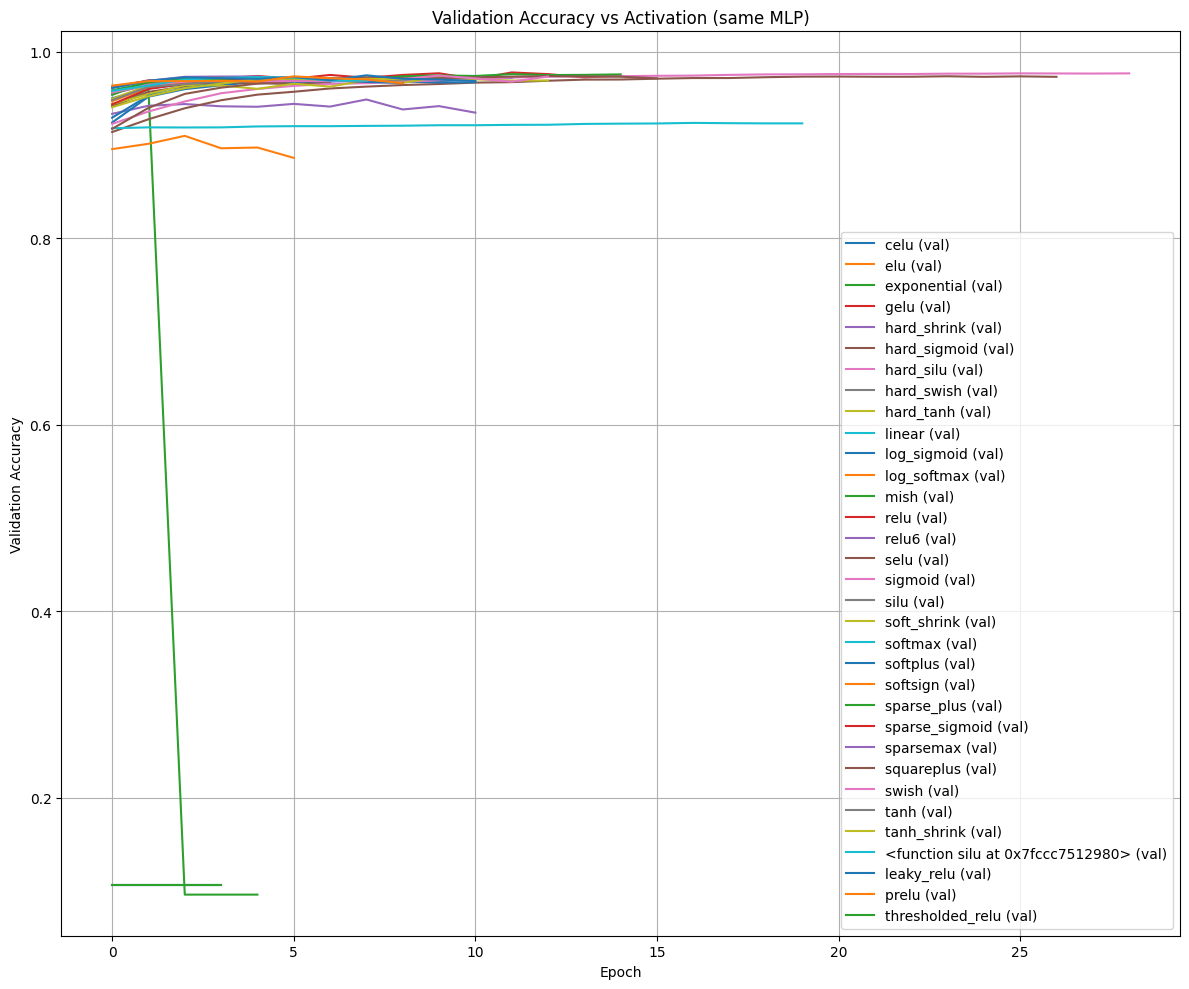

In [82]:
plt.figure(figsize=(12,10))
for act, h in histories.items():
    plt.plot(h["val_accuracy"], label=f"{act} (val)")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Activation (same MLP)")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

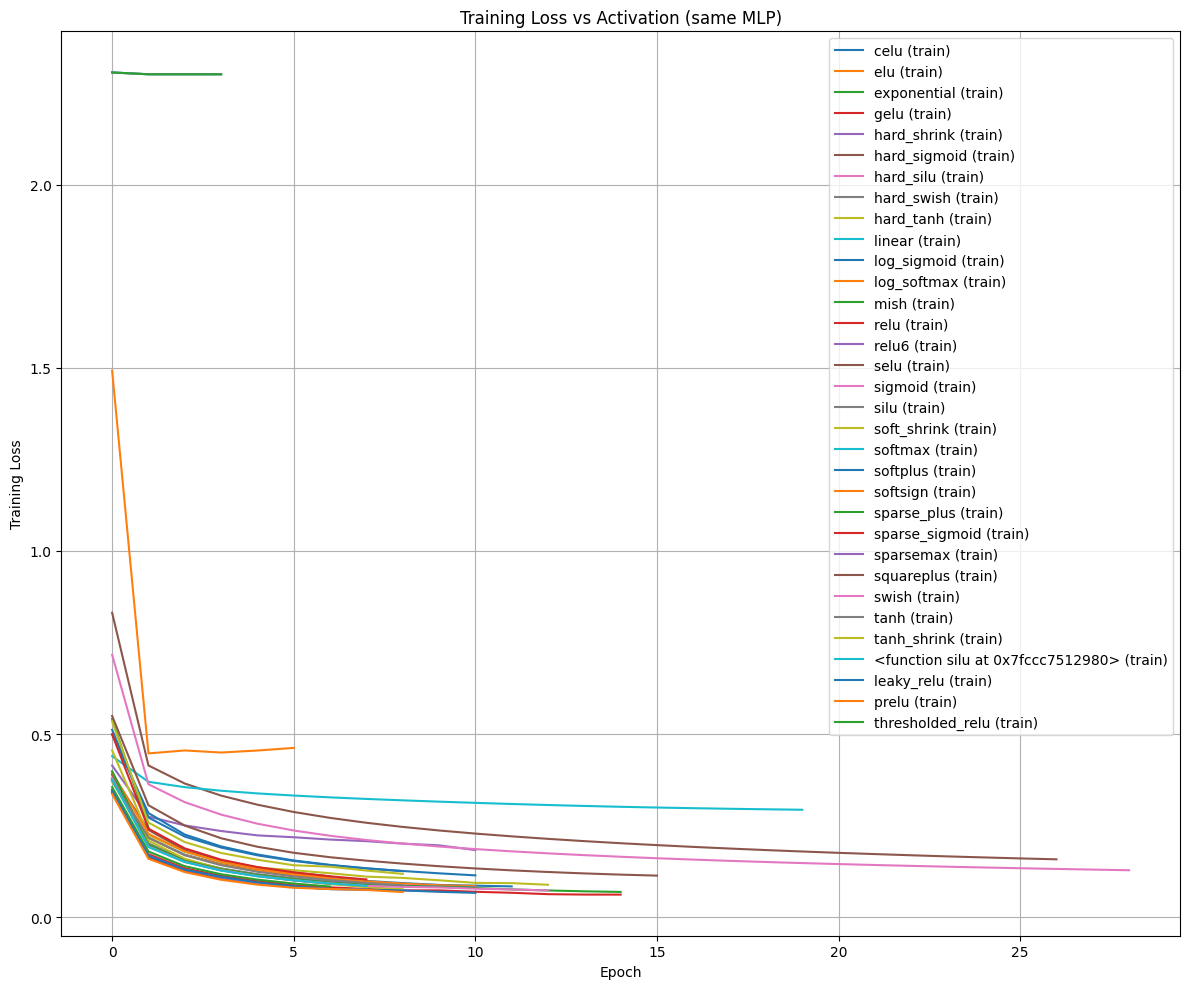

In [83]:
plt.figure(figsize=(12,10))
for act, h in histories.items():
    plt.plot(h["loss"], label=f"{act} (train)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Activation (same MLP)")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


Best activation overall: gelu | Test Acc = 0.9780


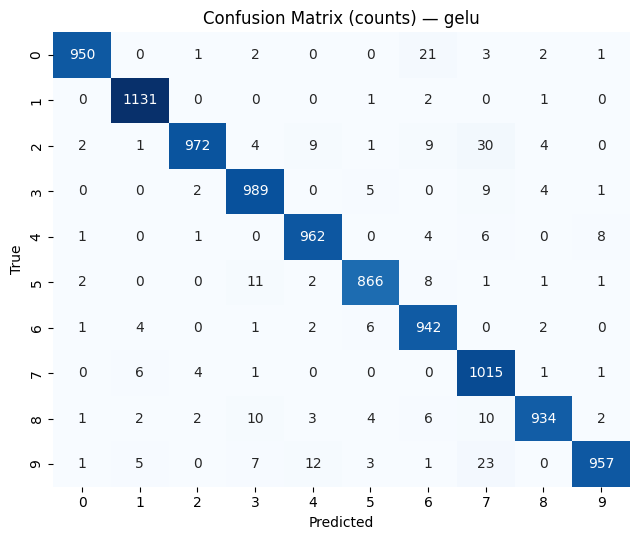

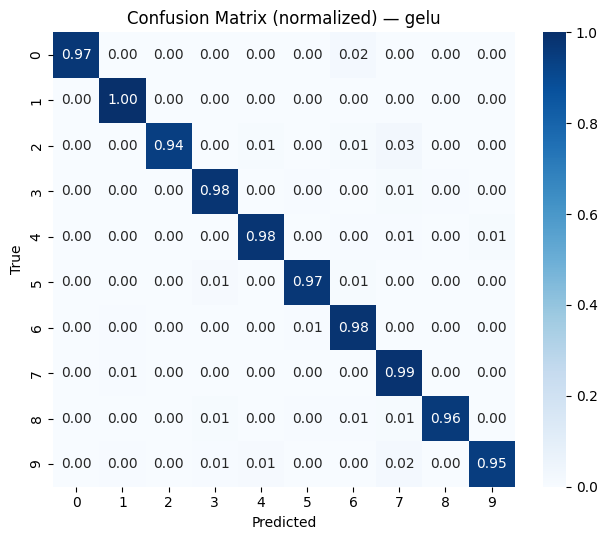

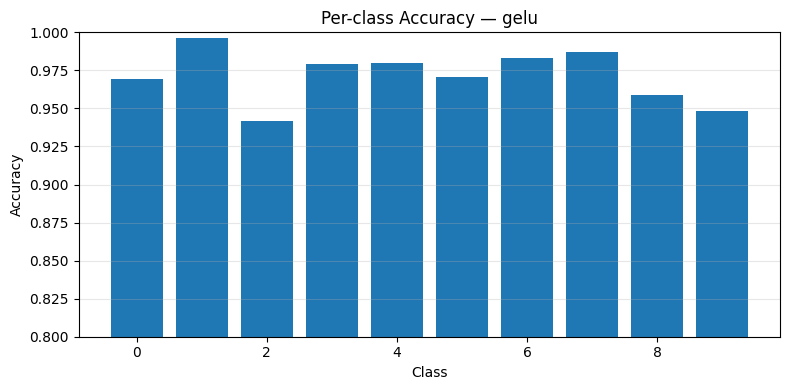


Classification report:
              precision    recall  f1-score   support

           0     0.9916    0.9694    0.9804       980
           1     0.9843    0.9965    0.9904      1135
           2     0.9898    0.9419    0.9652      1032
           3     0.9649    0.9792    0.9720      1010
           4     0.9717    0.9796    0.9757       982
           5     0.9774    0.9709    0.9741       892
           6     0.9486    0.9833    0.9657       958
           7     0.9253    0.9874    0.9553      1028
           8     0.9842    0.9589    0.9714       974
           9     0.9856    0.9485    0.9667      1009

    accuracy                         0.9718     10000
   macro avg     0.9723    0.9715    0.9717     10000
weighted avg     0.9724    0.9718    0.9718     10000


Top 5 most confused class pairs (true -> predicted, count):
2 → 7: 30
9 → 7: 23
0 → 6: 21
9 → 4: 12
5 → 3: 11


In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def name_of(act):
    return act.__name__ if callable(act) else str(act)

best_act = max(test_scores, key=lambda k: test_scores[k]["test_acc"])
print(f"\nBest activation overall: {best_act} | Test Acc = {test_scores[best_act]['test_acc']:.4f}")

best_model = make_mlp(hidden_activation=best_act)
best_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS, batch_size=BATCH, verbose=0, callbacks=callbacks
)

y_prob = best_model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

labels = list(range(10))
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

# Plot raw counts
plt.figure(figsize=(6.5,5.5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix (counts) — {best_act}")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

# Plot normalized (per-class accuracy)
plt.figure(figsize=(6.5,5.5))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
plt.title(f"Confusion Matrix (normalized) — {best_act}")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()

# Per-class accuracy bar
per_class_acc = np.diag(cm_norm)
plt.figure(figsize=(8,4))
plt.bar(labels, per_class_acc)
plt.ylim(0.8, 1.0)  # tweak if needed
plt.title(f"Per-class Accuracy — {best_act}")
plt.xlabel("Class"); plt.ylabel("Accuracy"); plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout(); plt.show()

# Text report
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# Most confused pairs (off-diagonal largest)
cm_off = cm.copy().astype(float)
np.fill_diagonal(cm_off, 0)
pairs = np.dstack(np.unravel_index(np.argsort(cm_off.ravel())[::-1], cm_off.shape))[0]
print("\nTop 5 most confused class pairs (true -> predicted, count):")
shown = 0
seen = set()
for i, j in pairs:
    if cm_off[i, j] <= 0: break
    if (i, j) in seen: continue
    print(f"{i} → {j}: {int(cm[i, j])}")
    seen.add((i, j))
    shown += 1
    if shown == 5: break
